✅ Data successfully loaded and prepared.

--- Data Preview: ---


,Date,Train_ID,RollingStock_Cert_Expiry,Signal_Cert_Expiry,Telecom_Cert_Expiry,JobCard_Open,JobCard_Type,JobCard_Priority,Branding_Contract_Hours,BrakePad_KM_Since_Change,Bogie_KM_Since_Service,HVAC_Operating_Hours,Avg_Vibration_Level,Max_Brake_Temp_Celsius,Decision_Today
0,2025-01-01,Train_01,2026-02-12,2026-10-07,2026-05-22,False,NaN,NaN,0,9542,11784,934,0.226,68.93,Service
1,2025-01-01,Train_02,2026-12-25,2026-11-09,2026-02-11,False,NaN,NaN,0,13654,10812,1105,0.241,83.55,Service
2,2025-01-01,Train_03,2026-09-21,2026-06-04,2026-06-17,False,NaN,NaN,0,7399,16979,1713,0.317,68.64,Service
3,2025-01-01,Train_04,2026-03-31,2025-08-27,2026-04-03,False,NaN,NaN,152,10124,11041,519,0.190,74.74,Service
4,2025-01-01,Train_05,2026-09-17,2025-12-23,2026-05-27,False,NaN,NaN,294,9358,16728,1826,0.274,73.41,Service




--- 2.1: Statistical Summary for Numerical Columns ---


,Date,RollingStock_Cert_Expiry,Signal_Cert_Expiry,Telecom_Cert_Expiry,Branding_Contract_Hours,BrakePad_KM_Since_Change,Bogie_KM_Since_Service,HVAC_Operating_Hours,Avg_Vibration_Level,Max_Brake_Temp_Celsius
count,9125,9125,9125,9125,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00
mean,2025-07-01 23:59:59.999999744,2026-07-21 12:28:48.000000256,2026-05-02 00:57:35.999999744,2026-12-24 09:36:00,6.72,14566.22,26153.79,2683.52,0.36,61.19
min,2025-01-01 00:00:00,2026-01-20 00:00:00,2025-08-18 00:00:00,2026-01-21 00:00:00,0.00,0.00,0.00,519.00,-0.03,25.00
25%,2025-04-02 00:00:00,2026-05-24 00:00:00,2026-01-05 00:00:00,2026-05-22 00:00:00,0.00,7734.00,14558.00,1971.00,0.24,25.00
50%,2025-07-02 00:00:00,2026-07-31 00:00:00,2026-05-06 00:00:00,2027-03-06 00:00:00,0.00,14691.00,24849.00,2682.00,0.35,69.55
75%,2025-10-01 00:00:00,2026-09-21 00:00:00,2026-09-18 00:00:00,2027-08-10 00:00:00,0.00,21171.00,38159.00,3371.00,0.48,78.97
max,2025-12-31 00:00:00,2026-12-31 00:00:00,2026-12-25 00:00:00,2027-12-09 00:00:00,363.00,37648.00,63052.00,4811.00,0.81,110.17
std,NaN,NaN,NaN,NaN,35.31,8363.06,14796.94,915.73,0.16,23.71



--- 2.2: Generating Key Visualizations ---


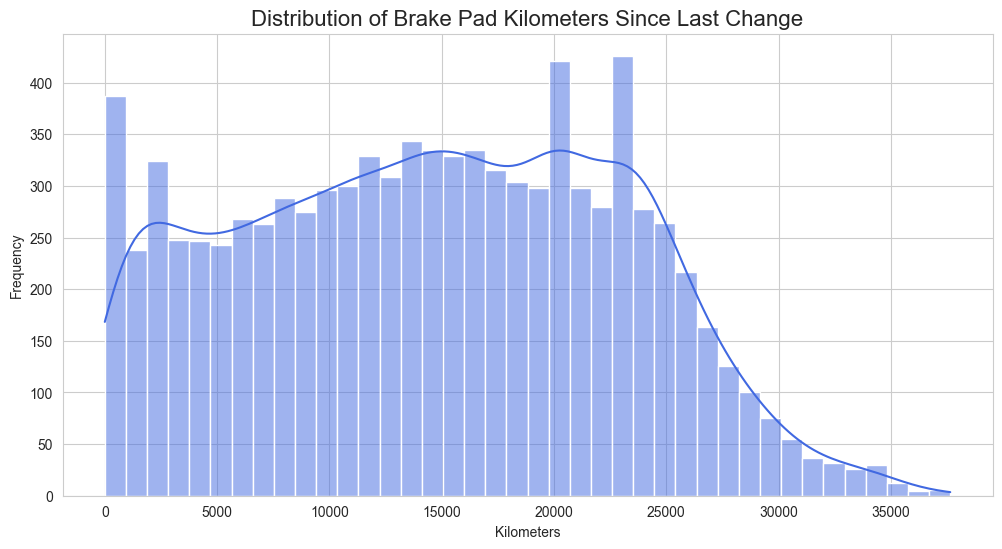

C:\Users\Asus\AppData\Local\Temp\ipykernel_26584\2210026309.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=maintenance_jobs.index, y=maintenance_jobs.values, palette='viridis')


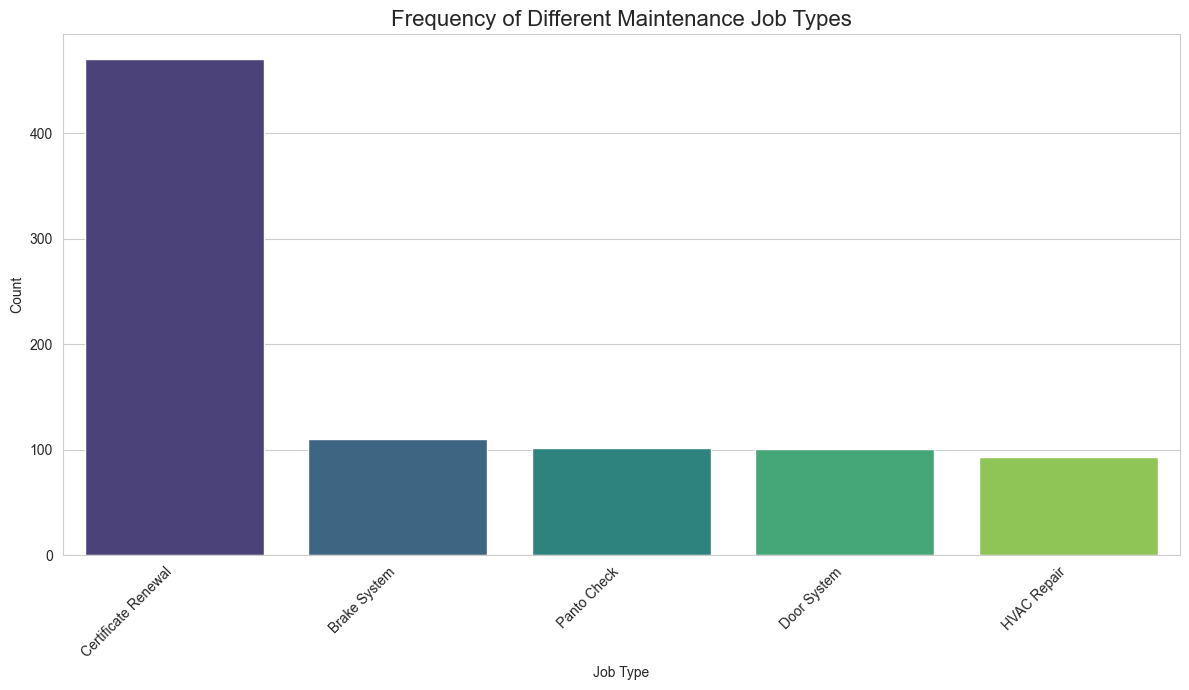

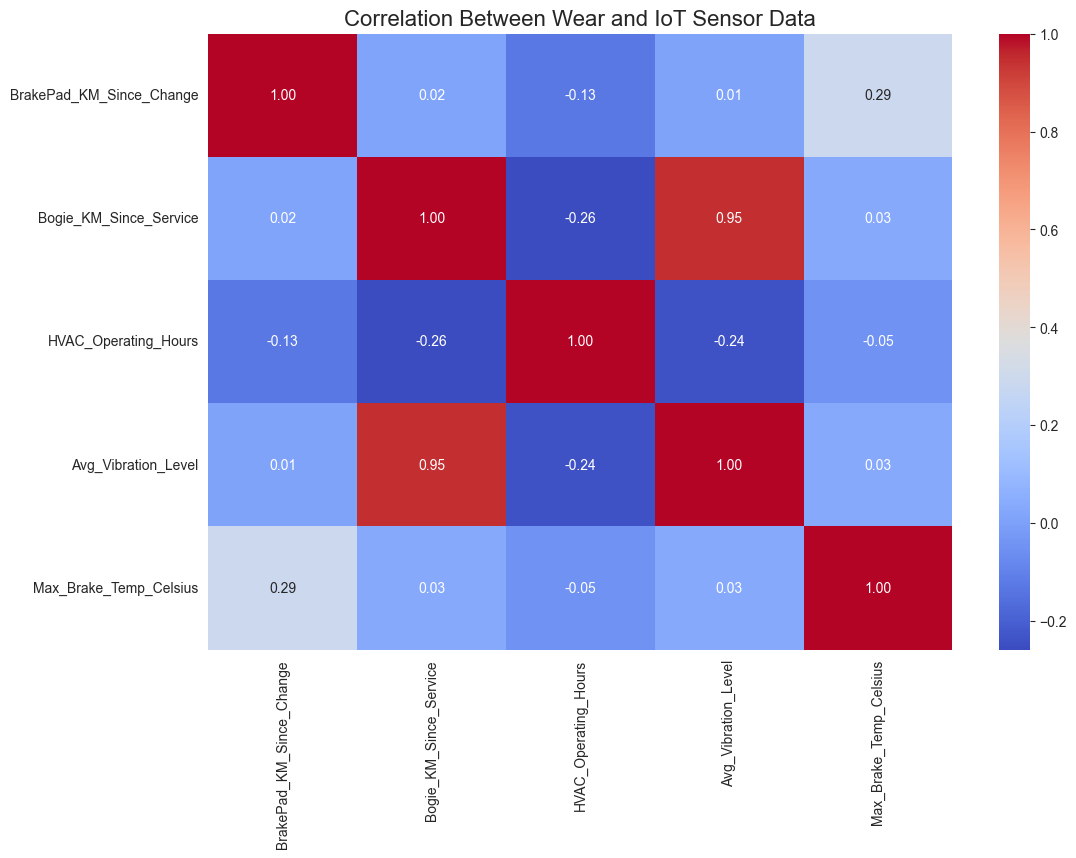



--- 3: Creating New Features for the Model ---
✅ New features created successfully.

--- Preview of Engineered Features: ---


,Train_ID,Date,Min_Cert_Days_to_Expiry,BrakePad_KM_Since_Change
0,Train_01,2025-01-01,407,9542
1,Train_02,2025-01-01,406,13654
2,Train_03,2025-01-01,519,7399
3,Train_04,2025-01-01,238,10124
4,Train_05,2025-01-01,356,9358




Analysis complete! Your data is now enriched and ready for model training.


In [1]:
# ==============================================================================
# STEP 1: LOAD LIBRARIES AND DATA
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from your project folder
file_path = 'kmrl_enhanced_dataset.csv'
df = pd.read_csv(file_path)

# --- Data Cleaning and Type Conversion ---
# Convert date columns to the proper datetime format for calculations
df['Date'] = pd.to_datetime(df['Date'])
df['RollingStock_Cert_Expiry'] = pd.to_datetime(df['RollingStock_Cert_Expiry'])
df['Signal_Cert_Expiry'] = pd.to_datetime(df['Signal_Cert_Expiry'])
df['Telecom_Cert_Expiry'] = pd.to_datetime(df['Telecom_Cert_Expiry'])

print("✅ Data successfully loaded and prepared.")
print("\n--- Data Preview: ---")
display(df.head())


# ==============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================================
# Let's understand the data's patterns through stats and visualizations.

print("\n\n--- 2.1: Statistical Summary for Numerical Columns ---")
# Set display format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
display(df.describe())

# --- Visualizations ---
sns.set_style("whitegrid")
print("\n--- 2.2: Generating Key Visualizations ---")

# a) Distribution of Brake Pad Wear
plt.figure(figsize=(12, 6))
sns.histplot(df['BrakePad_KM_Since_Change'], kde=True, bins=40, color='royalblue')
plt.title('Distribution of Brake Pad Kilometers Since Last Change', fontsize=16)
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.show()

# b) Frequency of Maintenance Job Types
plt.figure(figsize=(12, 7))
maintenance_jobs = df[df['JobCard_Open'] == True]['JobCard_Type'].value_counts()
sns.barplot(x=maintenance_jobs.index, y=maintenance_jobs.values, palette='viridis')
plt.title('Frequency of Different Maintenance Job Types', fontsize=16)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# c) Correlation Heatmap of Sensor and Wear Data
plt.figure(figsize=(12, 8))
correlation_cols = [
    'BrakePad_KM_Since_Change',
    'Bogie_KM_Since_Service',
    'HVAC_Operating_Hours',
    'Avg_Vibration_Level',
    'Max_Brake_Temp_Celsius'
]
corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Wear and IoT Sensor Data', fontsize=16)
plt.show()


# ==============================================================================
# STEP 3: FEATURE ENGINEERING
# ==============================================================================
# Here, we create new, smarter features from the raw data for our model.

print("\n\n--- 3: Creating New Features for the Model ---")

# Calculate 'Days to Expiry' for each certificate
df['RS_Cert_Days_to_Expiry'] = (df['RollingStock_Cert_Expiry'] - df['Date']).dt.days
df['Signal_Cert_Days_to_Expiry'] = (df['Signal_Cert_Expiry'] - df['Date']).dt.days
df['Telecom_Cert_Days_to_Expiry'] = (df['Telecom_Cert_Expiry'] - df['Date']).dt.days

# Create a single 'Risk' feature for the closest expiry date
df['Min_Cert_Days_to_Expiry'] = df[['RS_Cert_Days_to_Expiry', 'Signal_Cert_Days_to_Expiry', 'Telecom_Cert_Days_to_Expiry']].min(axis=1)

print("✅ New features created successfully.")
print("\n--- Preview of Engineered Features: ---")
display(df[['Train_ID', 'Date', 'Min_Cert_Days_to_Expiry', 'BrakePad_KM_Since_Change']].head())

print("\n\nAnalysis complete! Your data is now enriched and ready for model training.")